# Trabajo Dataset Astronómico
### Manuel Jaramillo O.

**En este trabajo se buscará generar un modelo que permita clasificar un Dataset Astronómico de objetos captados por un telescopio, por medio de los distintos parámetros registrados por este, clasificando estos en Estrellas, Galaxias o Quasares.**

**Para comenzar importamos el Dataset y lo desplegamos**

In [1]:
import pandas as pd
space_data = pd.read_csv("SDSS-DR14.csv")
space_data[:10000]

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.722360e+18,STAR,-0.000009,3306,54922,491
1,1.237650e+18,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.638140e+17,STAR,-0.000055,323,51615,541
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.232740e+17,GALAXY,0.123111,287,52023,513
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.722370e+18,STAR,-0.000111,3306,54922,510
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.722370e+18,STAR,0.000590,3306,54922,512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1.237650e+18,131.316413,51.539547,18.81777,17.47053,16.91508,16.68305,16.50570,1345,301,3,161,5.033450e+17,GALAXY,0.027583,447,51877,246
9996,1.237650e+18,131.306083,51.671341,18.27255,17.43849,17.07692,16.71661,16.69897,1345,301,3,162,5.033400e+17,GALAXY,0.117772,447,51877,228
9997,1.237650e+18,131.552562,51.666986,18.75818,17.77784,17.51872,17.43302,17.42048,1345,301,3,162,8.222620e+18,STAR,-0.000402,7303,57013,622
9998,1.237650e+18,131.477151,51.753068,18.88287,17.91068,17.53152,17.36284,17.13988,1345,301,3,163,5.033400e+17,GALAXY,0.014019,447,51877,229


### Identificación de los datos

**En este caso tenemos varias características registradas sobre las clases que queremos identificar. A continuación se detallará a que corresponde cada una.**

**objid:** ID del objeto.

**ra, dec:** Coordenadas para buscarlo en el cielo.

**u, r, g, i, z:** Magnitudes del objeto en el SDSS (telescopio).

**run:** Número del escaneo.

**rerun:** Tipo de procesamiento de la imágen.

**camcol:** Salida de una columna de la cámara.

**field:** Parte del camcol que es procesada por el Photo pipeline.

**specobjid:** Identificación para objetos electroscópicos.

**class:** Tipo de objeto. (Estrella, galaxia o quásar)

**redshift:** Velocidad de recesión de un objeto.

**plate:** Tipo de plato utilizado.

**mjd:** Modified Julian Date. (fecha en que se hizo el escaneo)

**fiberid:** ID de la fibra optica del spectograma.

**A continuación creamos un Dataset diferenciando la variable que queremos predecir.**

In [2]:
Y = space_data["class"]
X = space_data[['objid','ra','dec','u','g','r','i','z','run','rerun','camcol','field','specobjid','class','redshift','plate','mjd','fiberid']]

**Nuestra variable class,  se encuentra originalmente como tipo String, por lo que debemos cambiarla a una variable numérica, esto nos ayudará más adelante en las metodologías. (STAR:0, GALAXY:1, QSO:2)**

In [3]:
space_data["class"].replace({'STAR':0, 'GALAXY':1, 'QSO':2}, inplace=True)

**Considerando las variables con las que contamos en nuestro DataSet, nos encontramos que tres de ellas son ID, las que no afectarán de ninguna manera el calculo de las predicciones, por lo que las eliminaremos del Dataset**

In [4]:
space_data.drop(['objid','specobjid','fiberid'],axis=1,inplace=True)

**Otra de las variables que no nos ayudará en la predicción es la fecha en que se obtuvo el registro, por lo que tambien la eliminaremos**

In [5]:
space_data.drop(['mjd'],axis=1,inplace=True)

**A primera vista, nos parece que la variable "rerun" es la misma para todos los registros, por lo que procederemos a identificar si es que así es.**

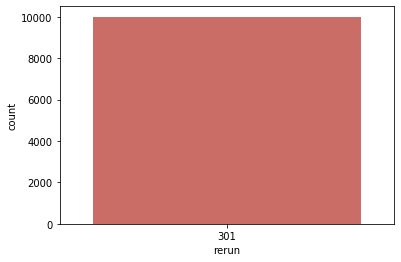

In [6]:
import seaborn as sb
sb.countplot(x='rerun',data=space_data, palette='hls')

**Efectivamente, la variable rerun es la misma para todos los valores, por lo que su inclusión o exclusión no afectará en las predicciones**

In [7]:
space_data.drop(['rerun'],axis=1,inplace=True)

**A continuación proceremos a realizar un mapa de calor sobre las variables que tenemos, con el objetivo de identificar dependencias entre algunas de ellas.**

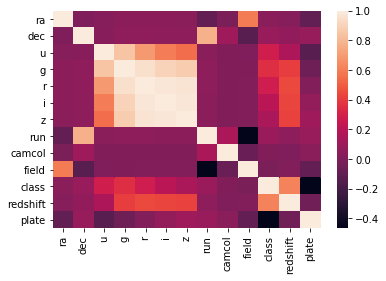

In [8]:
sb.heatmap(space_data.corr())

**En este caso notamos dependencias entre las variables run-field y class-plate (cuadros negros), por lo que procederemos a eliminar "run" en el primer caso, pero para el segundo caso, la variable plate es dependiente de la variable a predecir, por lo que puede significar que es un valor muy importante a la hora de predecir, por lo que no lo eliminaremos.**

In [9]:
space_data.drop(['run'],axis=1,inplace=True)

**A continuación se mostrará como ha quedado nuestro Dataset limpio.**

In [10]:
space_data[:10]

,ra,dec,u,g,r,i,z,camcol,field,class,redshift,plate
0,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,4,267,0,-0.000009,3306
1,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,4,267,0,-0.000055,323
2,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,4,268,1,0.123111,287
3,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,4,269,0,-0.000111,3306
4,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,4,269,0,0.000590,3306
5,183.847174,0.173694,19.43133,18.46779,18.16451,18.01475,18.04155,4,269,0,0.000315,324
6,183.864379,0.019201,19.38322,17.88995,17.10537,16.66393,16.36955,4,269,1,0.100242,287
7,183.900081,0.187473,18.97993,17.84496,17.38022,17.20673,17.07071,4,269,0,0.000315,3306
8,183.924588,0.097246,17.90616,16.97172,16.67541,16.53776,16.47596,4,270,0,0.000089,323
9,183.973498,0.081626,18.67249,17.71375,17.49362,17.28284,17.22644,4,270,1,0.040508,288


**Una vez tenemos el Dataset limpio, debemos verificar el balanceamiento entre las clases, con el objetivo de tener buenas predicciones para todas las clases.**

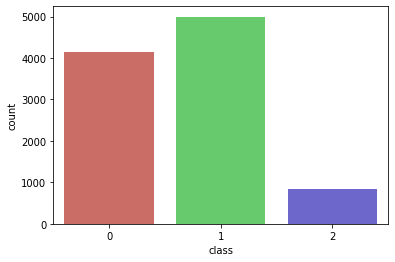

In [11]:
sb.countplot(x='class',data=space_data, palette='hls')

**Aquí notamos claramente un desbalance en los datos, donde la clase 2 es menor a 0 y 1 considerablemente, por lo que esto podría entregarnos malos resultados para las predicciones de Quasares.**

**Veamos si efectivamente este desbalance nos trae problemas para la predicción de Quasares por medio de la regresión logística.**

### Regresión Logística

In [12]:
import warnings
warnings.filterwarnings('ignore')

import sklearn
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


X = space_data.iloc[:,[0,1,2,3,4,5,6,7,8,10,11]].values
y = space_data.iloc[:,9].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state=25)
print(X_test)

LogReg = LogisticRegression(max_iter=200)
LogReg.fit(X_train, y_train)

y_pred = LogReg.predict(X_test)
y_pred

[[ 1.73573276e+02 -5.18472742e-01  1.94964800e+01 ...  3.86000000e+02
   1.53737800e+00  2.82000000e+02]
 [ 1.67449438e+02 -2.04307377e-01  1.92751600e+01 ...  3.45000000e+02
   1.35669600e-01  2.78000000e+02]
 [ 1.43997534e+01  1.46014995e+01  1.73216400e+01 ...  5.80000000e+01
   7.72250100e-02  4.21000000e+02]
 ...
 [ 2.40641309e+02  5.22508723e+01  1.67132200e+01 ...  5.65000000e+02
   5.13000000e-05  2.17600000e+03]
 [ 1.62119589e+02  6.60777332e-01  1.95107400e+01 ...  3.09000000e+02
   8.35642100e-02  2.75000000e+02]
 [ 2.74754742e+01  1.31266622e+01  1.90081700e+01 ...  1.44000000e+02
   1.70327900e-02  4.30000000e+02]]


array([0, 1, 1, ..., 0, 1, 1], dtype=int64)

**Revisión de estos resultados por medio de la matriz de confusión, con el objetivo de analizar precisión y recall.**

In [13]:
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.77      0.81      1300
           1       0.80      0.96      0.88      1453
           2       0.47      0.14      0.22       247

    accuracy                           0.81      3000
   macro avg       0.71      0.63      0.64      3000
weighted avg       0.80      0.81      0.79      3000



**Efectivamente notamos que la precisión y el recall para los Quasares (2) es menor que la de las estrellas (0) y las galaxias (1), por lo que debemos balancear.**

**Para esto utilizaremos el metodo de OverSampling.**

In [14]:
import imblearn
from imblearn.over_sampling import RandomOverSampler

os=RandomOverSampler()

X= space_data.iloc[:,[0,1,2,3,4,5,6,7,8,10,11]]
y= space_data.iloc[:,9]

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 25)
X_train_res, y_train_res = os.fit_sample(X_train, y_train)

**Una vez balanceado nuestro Dataset, realizaremos nuevamente la regresión logística para ver si nuestras predicciones mejoraron.**

In [16]:
LogReg = LogisticRegression(max_iter =200)
LogReg.fit(X_train_res, y_train_res)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=200,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [17]:
y_pred = LogReg.predict(X_test)
y_pred

array([2, 1, 1, ..., 0, 1, 1], dtype=int64)

In [18]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.71      0.79      1300
           1       0.84      0.93      0.89      1453
           2       0.56      0.79      0.65       247

    accuracy                           0.82      3000
   macro avg       0.76      0.81      0.78      3000
weighted avg       0.84      0.82      0.82      3000



### Resultados para la regresión logística:

**Resultados para la clase 0:  
Antes del balanceamiento:**  
Precisión: 85%, Recall: 77%, Promedio: 81%  
**Despues del balanceamiento:**  
Precisión: 89%, Recall: 71%, Promedio: 79%

**Resultados para la clase 1:  
Antes del balanceamiento:**    
Precisión: 80%, Recall: 96%, Promedio: 88%  
**Despues del balanceamiento:**    
Precisión: 84%, Recall: 93%, Promedio: 89%

**Resultados para la clase 2:  
Antes del balanceamiento:**    
Precisión: 47%, Recall: 14%, Promedio: 22%  
**Después del balanceamiento:**    
Precisión: 56%, Recall: 79%, Promedio: 65%

**Notamos una mejora considerable en los resultados obtenidos para la identificación de Quasares, aumentando estos en un 43% entre precisión y recall, donde sacrificamos un poco los resultados de la clase 0, pero la baja de este fue de un 2% lo que es casi nulo.
Además el número de iteraciones que consideramos fue de 200 (max_iter = 200), donde un número mayor de iteraciones del proceso nos entregaba un mejor resultado en cuanto a porcentajes, sin embargo consideraba una mayor carga para la computadora, lo cual es contraproducente en un caso hipotético donde se tuvieran muchos más registros.**


**Ventajas**

En este caso las ventajas de la regresión logística es que nos entrega datos fácilmente interpretables, utilizando una metodología bastante simple, la cual por medio de nuestra matriz de confusión, nos permite identificar la eficacia para predecir las clases de nuestro Dataset


**Desventajas**

Esta metodología nos impide resolver problemas que no son lineales. Por ejemplo, en el caso de que la probabilidad de una clase se reduzca inicialmente con una característica y posteriormente suba no puede ser registrado con un modelo logístico directamente, por lo que es necesario transformar esta característica previamente. Además las clases a predecir tambien deben ser linealmente separables.

### Regresión Lineal

**Realizaremos la regresión lineal para obtener los coeficientes (pesos) que acompañarán a las variables en la metodología para predecir la clase**

In [19]:
import statsmodels.api as sm

ols = sm.OLS(y_train_res, X_train_res).fit()
print(ols.summary())

                                 OLS Regression Results                                
Dep. Variable:                  class   R-squared (uncentered):                   0.912
Model:                            OLS   Adj. R-squared (uncentered):              0.912
Method:                 Least Squares   F-statistic:                              9994.
Date:                Tue, 02 Jun 2020   Prob (F-statistic):                        0.00
Time:                        12:56:02   Log-Likelihood:                         -4890.6
No. Observations:               10635   AIC:                                      9803.
Df Residuals:                   10624   BIC:                                      9883.
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

**Aquí obtuvimos los pesos que se asignarán a cada variable, los que corresponden a la primera columna de la tabla (coef), con los que procederemos a crear nuestro método predictivo**

In [20]:
def predlin(ra, dec, u, g, r, i, z, camcol, field, redshift, plate):
    return ((2.773e-05 * ra) + (0.0016 * dec) + (-0.7808 * u) + (1.4103 * g) + (0.2487 * r) + (0.0363 * i)+(-0.8525* z)+( 0.0049 * camcol)+
          (-0.0001* field)+(0.5858 * redshift)+(-9.229e-05 * plate))

**Ahora pondremos a prueba nuestro método asignandole valores de la tabla, donde sabemos previamente que corresponden a la clase 0, 1 y 2, respectivamente**

In [21]:
# class0, utilizando el registro 1
predlin(183.598371, 0.135285, 18.66280, 17.21449, 16.67637, 16.48922, 16.39150, 4, 267, -0.000055, 323)

0.44626491182783157

In [22]:
#class 0, utilizando el registro 4
predlin(183.883288, 0.102557, 17.55025, 16.26342, 16.43869, 16.55492, 16.61326, 4, 269, 0.000590, 3306)

-0.5472942682237574

In [23]:
#class 1, utilizando el registro 998
predlin(148.879627, 0.354850, 19.09695, 17.10244, 16.01278, 15.56219, 15.18301, 4, 221, 0.126105, 267)

0.8638695010567118

In [24]:
#class 1, utilizando el registro 4997
predlin(171.631152, 67.968099, 19.33876, 18.15172, 17.46325, 17.11398, 16.88304, 6, 336, 0.123745, 491)

1.2077067782449593

In [25]:
#class 2, utilizando el registro 1495
predlin(55.102430, -5.319284, 18.45240, 17.90763, 17.95855, 17.86951, 17.67394, 6, 141, 2.339685, 462)

2.2316840459839007

In [26]:
#class 2, utilizando el registro 4999
predlin(171.966494, 67.845192, 18.05594, 17.92417, 17.65590, 17.24964, 17.28082, 6, 337, 0.193850, 491)

1.6429280890786226

**Resultados de las predicciones**  

**Para la clase 0:**  

**Tenemos que en el primer caso predijo la clase 0, con un desfase de 44,6%, mientras que en el segundo caso lo hizo con un desfase del 54,7%, por lo que, vagamente, considerando dos casos random, tenemos una precisión con un desfase muy malo de 49,65%.  
Estos valores se consideran como una predicción 0, ya que ambos valores se encontraban más cerca (numéricamente) del 0, que del 1 o el 2.**  

**Para la clase 1:**  

**Tenemos que en el primer caso predijo la clase 1, con un desfase de 13,7%, mientras que en el segundo caso lo hizo con un desfase del 20,7%, por lo que, vagamente, considerando dos casos random, tenemos una precisión bastante aceptable con un desfase de 17,2%.  
Estos valores se consideran como una predicción 1, ya que ambos valores se encontraban más cerca (numéricamente) del 1, que del 0 o el 2.**  

**Para la clase 2:**  

**Tenemos que en el primer caso predijo la clase 2, con un desfase de 23,1%, mientras que en el segundo caso lo hizo con un desfase del 35,8%, por lo que, vagamente, considerando dos casos random, tenemos una precisión con un desfase considerable de 29,45%.  
Estos valores se consideran como una predicción 2, ya que ambos valores se encontraban más cerca (numéricamente) del 2, que del 0 o el 1.**

### Resultados para la regresión lineal

**En esta metodología los valores obtenidos son bastante ambiguos, ya que efectivamente en los casos que consideramos predijo corresctamente las clases a las que correspondian dichos resgistros, pero algunos valores tenían un desfase bastante considerable, lo que los podría llevar en algún punto a caer dentro de otra de las clases que hay.**

**Algo destacable a considerar a partir de la obtención de los coeficientes en esta metodología es la importancia de las variables u, g y z, los cuales se caracterízan por ser los coeficientes mas grandes (positiva o negativamente) lo cual nos podría llevar a interpretar que estos valores determinan la clase a la que corresponde el registro, sin embargo estos valores son altos debido a que las variables no estan normalizadas, donde los valores que tienen estas tres variables van entre 15 y 19, mientras que otras variables como ra, field o plate tienen valores medidos en centenas, por lo que sus coeficientes son menores para tratar de encasillar los resultados en 0, 1 o 2.**.

### Árbol de desición:

**A continuación utilizaremos la última de las metodologías para predecir**

**Importamos la librería para trabajar con el arbol y le pasamos nuestro Dataset balanceado.**

In [27]:
from sklearn import tree

arcl = tree.DecisionTreeClassifier()
arcl = arcl.fit(X_train_res, y_train_res)

**Realizamos la predicción y la analizamos con la matriz de confusión para obtener la precisón y el recall de los resultados.**

In [28]:
y_pred = arcl.predict(X_test)

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)
print(classification_report(y_test, y_pred))

[[1290    8    2]
 [   2 1436   15]
 [   0   25  222]]
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      1300
           1       0.98      0.99      0.98      1453
           2       0.93      0.90      0.91       247

    accuracy                           0.98      3000
   macro avg       0.97      0.96      0.96      3000
weighted avg       0.98      0.98      0.98      3000



### Resultados para el árbol de desición:

**Resultados para la clase 0:**  
Precisión: 100%, Recall: 99%, Promedio: 100%

**Resultados para la clase 1:**    
Precisión: 98%, Recall: 99%, Promedio: 98%

**Resultados para la clase 2:**  
Precisión: 93%, Recall: 90%, Promedio: 91%  

**En esta metodología obtenemos óptimos resultados sin la necesidad de estar iterando continuamente.  
Este método le asigna pesos a las variables más importantes y en base a ellas va clasificando en las distintas clases por medio de preguntas lógicas.**

**A continuación se genera un .png del árbol de desición obtenido del Dataset**

In [29]:
from sklearn.externals.six import StringIO
import pydot

dot_data = StringIO()

features=['ra', 'dec', 'u', 'g','r','i','z','camcol','field','redshift','plate']
classes=['0','1','2']

tree.export_graphviz(arcl, out_file=dot_data, feature_names=features, class_names=classes, filled=True, rounded=True, impurity=False)

graph = pydot.graph_from_dot_data(dot_data.getvalue())
graph[0].write_png('arbol.png')

**Una vez generada la imágen, la importamos**

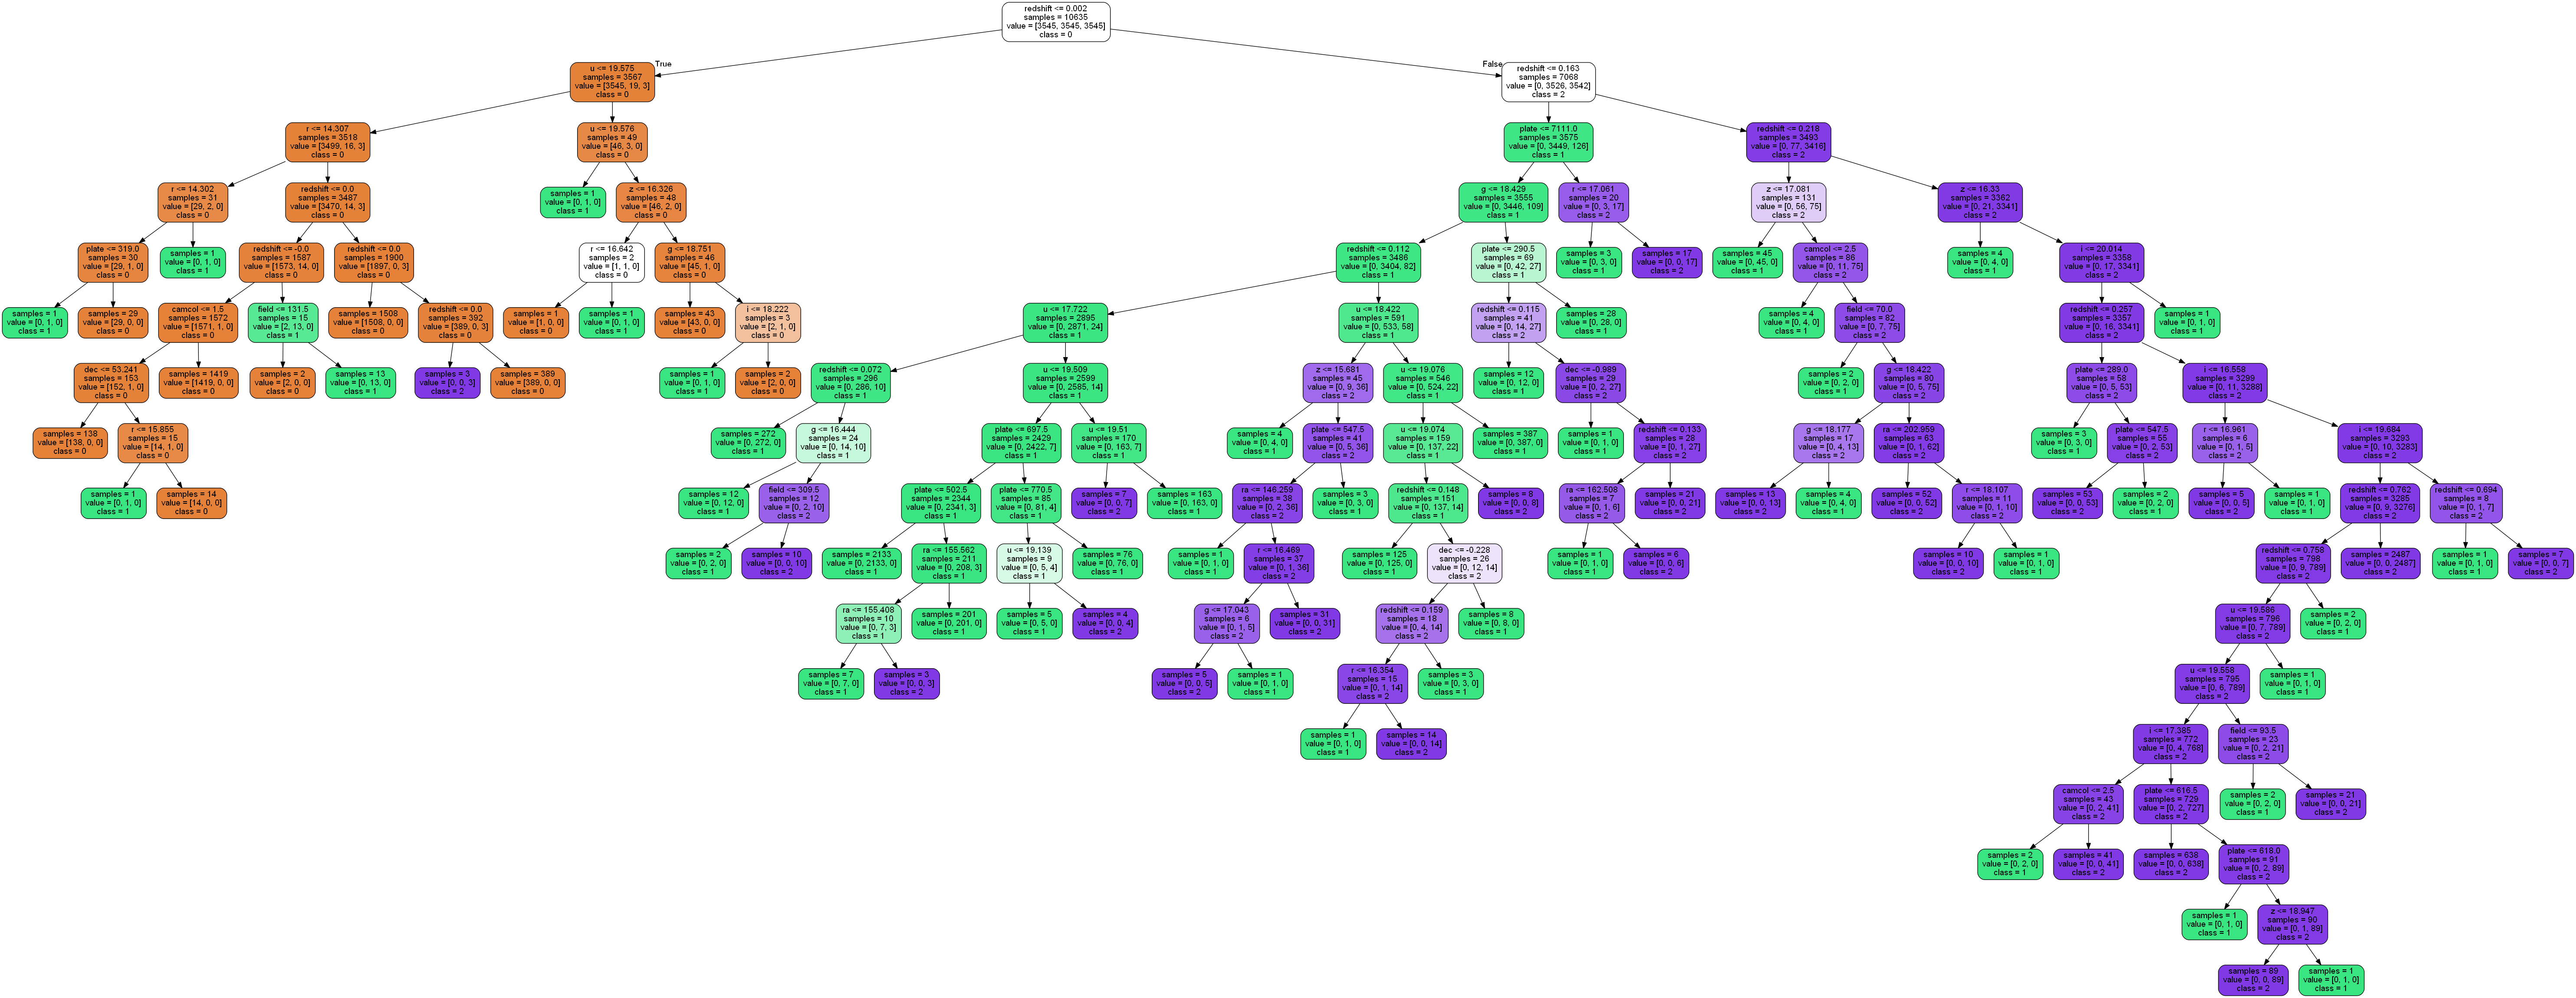

In [30]:
from IPython.display import Image
Image("arbol.png")

### Interpretación árbol de desición

**En este caso la variable a la que se le dio más peso fue a redshift, la cual nos entrega la mayor pulcritud en cuanto a pureza obtenida por medio de su pregunta lógica, donde si su valor es menor o igual a 0.002, es muy probable que el objeto identificado sea de clase 0, es decir una Estrella, mientras que si es mayor a este valor, es muy probable que sea una Galaxia o un Quasar, esto es claramente identificable al ver la segunda consulta que genera redshift donde los valores de los samples obtenidos son {0, 3526, 3539}, es decir, esta consulta nos deja 0% de probabilidad de que haya una estrella con un redshift mayor a 0.002.**  

**A continuación se vuelve a utilizar esta variable para clasificar entre Galaxias y Quasares, donde, si el valor de este es menor o igual a 0.172 es muy probable que el objeto identificado sea de clase 2, es decir, un Quasar.**  

**Así continuamente se van haciendo consultas por medio de los valores que toman las variables del dataset considerando las que se encuentran "más arriba" como las que nos entregan una mayor pulcritud en la clasificación de las clases.**

## Conclusión

**Considerando la simpleza que nos entrega el árbol de desición en cuanto a las otras dos metodologías podríamos considerarlo como el mejor método para hacer predicciones, ya que por medio de la matriz de confusión pudimos notar resultados excelentes en cuanto a precisión y recall a la hora de predecir la clase a la que correspondía el registro, superando a la regresión logística en 21%, 9% y 26% para las clases 0, 1 y 2 respectivamente, y en cuanto a su superioridad a la regresión lineal, la forma de mostrar la importancia de las variables por medio de un árbol, que va registrando qué tan pulcro va siendo el resultado de las predicciones a medida que se van haciendo las consultas binarias, es mucho mejor que contar con coeficientes que solo nos entregan un resultado matemático que, además, debe ser interpretado.**    

**Por lo tanto, de estas tres metodologías, la mejor es la del árbol de desición, entregando predicciones para Estrellas, Galaxias y Quasares de nuestro Dataset, casi perfectas.**